In [1]:
# 퍼셉트론 파이썬 코딩

import numpy as np # numpy 라이브러리를 불러옴
x2 = np.array([1,0,1]) # [그림 4-3(a)]의 샘플 x2
w = np.array([-0.5, 1.0, 1.0]) # [그림 4-3(b)]의 퍼셉트론 가중치 벡터
s = sum(x2 * w) # 요소별로 곱한 후 합산
print(s) # 결과 출력

import numpy as np # numpy 라이브러리를 불러옴
x = np.array([[1,0,0], [1,0,1], [1,1,0], [1,1,1]]) # [그림 4-3(a)]의 4개 샘플 
w = np.array([-0.5, 1.0, 1.0]) # [그림 4-3(b)]의 퍼셉트론 가중치 벡터
s = np.sum(x * w, axis=1) # 샘플 각각에 대해 요소별로 곱한 후 합산
print(s) # 결과 출력

0.5
[-0.5  0.5  0.5  1.5]


In [1]:
# OR 데이터에 퍼셉트론 적용

from sklearn.linear_model import Perceptron # 사이킷런의 Perceptron 클래스를 불러옴

# 훈련 집합 구축
x = [[0, 0], [0, 1], [1, 0], [1, 1]] # OR 데이터
y = [-1, 1, 1, 1] # OR 데이터의 정답 레이블

# fit 함수로 Perceptron 학습
p = Perceptron() # Perceptron 객체 생성
p.fit(x, y) # 훈련 집합으로 학습

print("학습된 퍼셉트론의 매개변수: ", p.coef_, p.intercept_)
print("훈련집합에 대한 예측: ", p.predict(x)) 
print("정확률 측정: ", p.score(x,y) * 100, "%")

학습된 퍼셉트론의 매개변수:  [[2. 2.]] [-1.]
훈련집합에 대한 예측:  [-1  1  1  1]
정확률 측정:  100.0 %


In [2]:
# 필기 숫자 데이터 인식

from sklearn import datasets # 사이킷런의 datasets 모듈을 불러옴
from sklearn.linear_model import Perceptron # 사이킷런의 Perceptron 클래스를 불러옴
from sklearn.model_selection import train_test_split # 훈련/테스트 데이터 분할을 위한 함수를 불러옴
import numpy as np # numpy 라이브러리를 불러옴

# 데이터셋을 읽고 훈련 집합과 테스트 집합으로 분할
digit = datasets.load_digits() # 필기 숫자 데이터셋을 읽음
x_train, x_test, y_train, y_test = train_test_split(digit.data, digit.target, train_size=0.6) # 훈련 집합과 테스트 집합으로 분할

# fit 함수로 Perceptron 학습
p = Perceptron(max_iter = 100, eta0 = 0.001, verbose = 0) # Perceptron 객체 생성
p.fit(x_train, y_train) # digit 데이터로 모델링

res = p.predict(x_test) # 테스트 집합으로 예측

# 혼동 행렬
conf = np.zeros((10, 10)) # 10x10 행렬 생성
for i in range(len(res)): # 예측 결과를 혼동 행렬에 저장
    conf[res[i]][y_test[i]] += 1 # 예측 결과와 실제 결과를 비교하여 혼동 행렬에 저장
print(conf) # 혼동 행렬 출력

# 정확률 계산
no_correct = 0 # 맞춘 개수 초기화
for i in range(10) : # 10개의 숫자에 대해 반복
    no_correct += conf[i][i] # 맞춘 개수 누적
accuracy = no_correct / len(res) # 정확률 계산
print("테스트 집합에 대한 정확률은 ", accuracy * 100, "%입니다.") # 정확률 출력

[[57.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0. 58.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  4. 71.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  3.  0. 58.  0.  0.  0.  0.  0.  0.]
 [ 0.  2.  0.  0. 75.  0.  0.  0.  0.  0.]
 [ 1.  2.  0.  2.  0. 69.  1.  0.  1.  1.]
 [ 0.  2.  0.  0.  0.  0. 66.  0.  3.  0.]
 [ 0.  0.  0.  1.  0.  0.  0. 77.  0.  0.]
 [ 0. 12.  1.  4.  2.  0.  0.  0. 63.  6.]
 [ 0.  0.  0.  1.  1.  0.  0.  0.  0. 72.]]
테스트 집합에 대한 정확률은  92.62865090403338 %입니다.


In [3]:
# sklearn의 필기 숫자 데이터셋

from sklearn import datasets # 사이킷런의 datasets 모듈을 불러옴
from sklearn.neural_network import MLPClassifier # 다층 퍼셉트론을 위한 MLPClassifier 클래스를 불러옴
from sklearn.model_selection import train_test_split # 훈련/테스트 데이터 분할을 위한 함수를 불러옴
import numpy as np # numpy 라이브러리를 불러옴

# 데이터셋을 읽고 훈련 집합과 테스트 집합으로 분할
digit = datasets.load_digits() # 필기 숫자 데이터셋을 읽음
x_train, x_test, y_train, y_test = train_test_split(digit.data, digit.target, train_size = 0.6) # 훈련 집합과 테스트 집합으로 분할

# MLP 분류기 모델을 학습
mlp = MLPClassifier(hidden_layer_sizes=(100), learning_rate_init=0.001, batch_size=32, max_iter=300
                    ,solver='sgd', verbose=True) # MLPClassifier 객체 생성
mlp.fit(x_train, y_train) # digit 데이터로 모델링

res = mlp.predict(x_test) # 테스트 집합으로 예측

# 혼동 행렬
conf = np.zeros((10, 10)) # 10x10 행렬 생성
for i in range(len(res)): # 예측 결과를 혼동 행렬에 저장
    conf[res[i]][y_test[i]] += 1 # 예측 결과와 실제 결과를 비교하여 혼동 행렬에 저장
print(conf) # 혼동 행렬 출력

# 정확률 계산
no_correct = 0 # 맞춘 개수 초기화
for i in range(10) : # 10개의 숫자에 대해 반복
    no_correct += conf[i][i] # 맞춘 개수 누적
accuracy = no_correct / len(res) # 정확률 계산
print("테스트 집합에 대한 정확률은 ", accuracy * 100, "%입니다.") # 정확률 출력

Iteration 1, loss = 2.16496116
Iteration 2, loss = 0.29251508
Iteration 3, loss = 0.19900280
Iteration 4, loss = 0.15620666
Iteration 5, loss = 0.12668904
Iteration 6, loss = 0.11376924
Iteration 7, loss = 0.09947766
Iteration 8, loss = 0.08883888
Iteration 9, loss = 0.08040684
Iteration 10, loss = 0.07349897
Iteration 11, loss = 0.06426650
Iteration 12, loss = 0.06270996
Iteration 13, loss = 0.05606600
Iteration 14, loss = 0.05338388
Iteration 15, loss = 0.04731124
Iteration 16, loss = 0.04857446
Iteration 17, loss = 0.04236449
Iteration 18, loss = 0.04010767
Iteration 19, loss = 0.03552219
Iteration 20, loss = 0.03377741
Iteration 21, loss = 0.03246773
Iteration 22, loss = 0.03152257
Iteration 23, loss = 0.02853407
Iteration 24, loss = 0.02816129
Iteration 25, loss = 0.02608457
Iteration 26, loss = 0.02496774
Iteration 27, loss = 0.02387046
Iteration 28, loss = 0.02251649
Iteration 29, loss = 0.02209947
Iteration 30, loss = 0.02028500
Iteration 31, loss = 0.01984485
Iteration 32, los

In [4]:
# MNIST 데이터셋을 다층 퍼셉트론으로 인식

from sklearn.datasets import fetch_openml # MNIST 데이터셋을 불러오기 위한 함수
from sklearn.neural_network import MLPClassifier # 다층 퍼셉트론을 위한 MLPClassifier 클래스를 불러옴
import matplotlib.pyplot as plt # 그래프 출력을 위한 matplotlib 라이브러리
import numpy as np # numpy 라이브러리를 불러옴

# MNIST 데이터셋을 읽고 훈련 집합과 테스트 집합으로 분할
mnist = fetch_openml('mnist_784') # MNIST 데이터셋을 읽음
mnist.data = mnist.data / 255.0 # 픽셀 값을 0~1로 정규화

x_train = mnist.data[:60000]; # 훈련 집합
x_test = mnist.data[60000:] # 테스트 집합
y_train = np.int16(mnist.target[:60000]); # 훈련 집합의 레이블
y_test = np.int16(mnist.target[60000:]) # 테스트 집합의 레이블

# MLP 분류기 모델을 학습
mlp = MLPClassifier(hidden_layer_sizes=(100), learning_rate_init=0.001, batch_size = 512, max_iter=300, solver='adam', verbose = True) # MLPClassifier 객체 생성
mlp.fit(x_train, y_train) # MNIST 데이터로 모델링

# 테스트 집합으로 예측
res = mlp.predict(x_test) # 테스트 집합으로 예측

# 혼동 행렬
conf = np.zeros((10, 10), dtype = np.int16) # 10x10 행렬 생성
for i in range(len(res)):
    conf[res[i]][y_test[i]] += 1 # 예측 결과를 혼동 행렬에 저장
print(conf) # 혼동 행렬 출력

# 정확률 계산
no_correct = 0 # 맞춘 개수 초기화
for i in range(10) : # 10개의 숫자에 대해 반복
    no_correct += conf[i][i] # 맞춘 개수 누적
accuracy = no_correct / len(res) # 정확률 계산
print("테스트 집합에 대한 정확률은 ", accuracy * 100, "%입니다.") # 정확률 출력

Iteration 1, loss = 0.60385040
Iteration 2, loss = 0.25980950
Iteration 3, loss = 0.20200960
Iteration 4, loss = 0.16810172
Iteration 5, loss = 0.14452199
Iteration 6, loss = 0.12654604
Iteration 7, loss = 0.11227150
Iteration 8, loss = 0.10091022
Iteration 9, loss = 0.09056034
Iteration 10, loss = 0.08212722
Iteration 11, loss = 0.07445319
Iteration 12, loss = 0.06843328
Iteration 13, loss = 0.06304936
Iteration 14, loss = 0.05768340
Iteration 15, loss = 0.05366852
Iteration 16, loss = 0.04985600
Iteration 17, loss = 0.04570563
Iteration 18, loss = 0.04243007
Iteration 19, loss = 0.03948711
Iteration 20, loss = 0.03656495
Iteration 21, loss = 0.03468294
Iteration 22, loss = 0.03226474
Iteration 23, loss = 0.02954133
Iteration 24, loss = 0.02738109
Iteration 25, loss = 0.02566940
Iteration 26, loss = 0.02389466
Iteration 27, loss = 0.02235578
Iteration 28, loss = 0.02087386
Iteration 29, loss = 0.01946276
Iteration 30, loss = 0.01853793
Iteration 31, loss = 0.01689971
Iteration 32, los

하이퍼 매개변수 최적화에 걸린 시간은 190.13557696342468 초입니다.


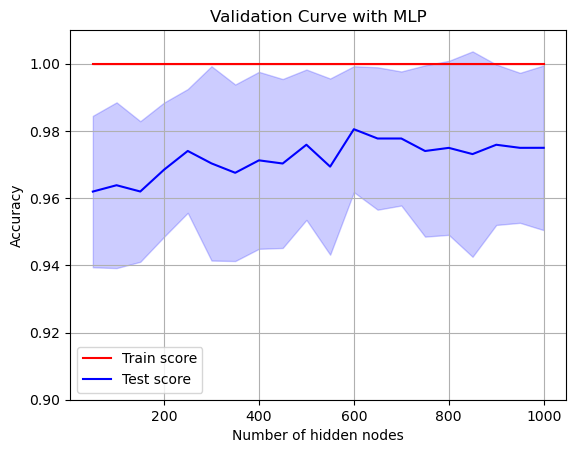


최적의 은닉층의 노드 개수는 600 개입니다.

[[70  0  0  0  0  0  0  0  0  0]
 [ 0 75  1  0  0  0  2  0  2  1]
 [ 0  0 65  0  0  0  0  0  0  0]
 [ 0  0  0 74  0  0  0  0  0  1]
 [ 0  0  0  0 73  0  0  0  0  0]
 [ 0  0  0  0  0 74  1  0  0  0]
 [ 0  0  0  0  0  1 69  0  0  0]
 [ 0  0  0  0  0  0  0 60  0  0]
 [ 0  0  0  2  0  0  1  0 68  1]
 [ 0  0  0  1  4  0  0  0  0 73]]
테스트 집합에 대한 정확률은  97.49652294853965 %입니다.


In [5]:
# validation_curve 함수로 최적의 은닉 노드 개수 찾기

from sklearn import datasets # 사이킷런의 datasets 모듈을 불러옴
from sklearn.neural_network import MLPClassifier # 다층 퍼셉트론을 위한 MLPClassifier 클래스를 불러옴
from sklearn.model_selection import train_test_split, validation_curve 
import numpy as np # numpy 라이브러리를 불러옴
import matplotlib.pyplot as plt # 그래프 출력을 위한 matplotlib 라이브러리
import time # 시간 측정을 위한 time 라이브러리

# 데이터셋을 읽고 훈련 집합과 테스트 집합으로 분할
digit = datasets.load_digits() # 필기 숫자 데이터셋을 읽음
x_train, x_test, y_train, y_test = train_test_split(digit.data, digit.target, train_size = 0.6) # 훈련 집합과 테스트 집합으로 분할

# 다층 퍼셉트론을 교차 검증으로 성능 평가 (소요 시간 측정 포함)
start = time.time() # 시작 시간 측정
mlp = MLPClassifier(learning_rate_init=0.001, batch_size=32, max_iter=300, solver='sgd') # MLPClassifier 객체 생성
prange = range(50,1001,50) # 은닉 노드 개수 범위 설정
train_score, test_score = validation_curve(mlp, x_train, y_train, param_name='hidden_layer_sizes',
                                           param_range = prange, cv = 10, scoring = 'accuracy', n_jobs = 4) # 교차 검증 수행
end = time.time() # 종료 시간 측정
print("하이퍼 매개변수 최적화에 걸린 시간은", end-start, "초입니다.") # 소요 시간 출력

# 교차 검증 결과의 평균과 분산 구하기
train_mean = np.mean(train_score, axis=1) # 훈련 집합의 평균
train_std = np.std(train_score, axis=1) # 훈련 집합의 표준편차
test_mean = np.mean(test_score, axis=1) # 테스트 집합의 평균
test_std = np.std(test_score, axis=1) # 테스트 집합의 표준편차

# 성능 그래프 그리기
plt.plot(prange, train_mean, label='Train score', color = 'r') # 훈련 집합의 평균 그래프
plt.plot(prange, test_mean, label='Test score', color = 'b') # 테스트 집합의 평균 그래프
plt.fill_between(prange, train_mean - train_std, train_mean + train_std, alpha = 0.2, color = 'r') # 훈련 집합의 표준편차 그래프
plt.fill_between(prange, test_mean - test_std, test_mean + test_std, alpha = 0.2, color = 'b') # 테스트 집합의 표준편차 그래프
plt.legend(loc = 'best') # 범례 표시
plt.title('Validation Curve with MLP') # 그래프 제목
plt.xlabel('Number of hidden nodes'); # x축 레이블
plt.ylabel('Accuracy'); # y축 레이블
plt.ylim(0.9, 1.01) # y축 범위 설정
plt.grid(axis = 'both') # 격자 표시
plt.show() # 그래프 출력

best_number_nodes = prange[np.argmax(test_mean)] # 최적의 은닉 노드 개수
print("\n최적의 은닉층의 노드 개수는", best_number_nodes, "개입니다.\n") # 최적의 은닉 노드 개수 출력

# 최적의 은닉 노드 개수로 모델링
mlp_test = MLPClassifier(hidden_layer_sizes = (best_number_nodes), learning_rate_init = 0.001, batch_size = 32, max_iter=300, solver = 'sgd') # MLPClassifier 객체 생성
mlp_test.fit(x_train, y_train)  # digit 데이터로 모델링

# 테스트 집합으로 예측
res = mlp_test.predict(x_test) 

# 혼동 행렬
conf = np.zeros((10, 10), dtype = np.int16) # 10x10 행렬 생성
for i in range(len(res)): # 예측 결과를 혼동 행렬에 저장
    conf[res[i]][y_test[i]] += 1 # 예측 결과와 실제 결과를 비교하여 혼동 행렬에 저장
print(conf) # 혼동 행렬 출력

# 정확률 계산
no_correct = 0 # 맞춘 개수 초기화
for i in range(10) : # 10개의 숫자에 대해 반복
    no_correct += conf[i][i] # 맞춘 개수 누적
accuracy = no_correct / len(res) # 정확률 계산
print("테스트 집합에 대한 정확률은 ", accuracy * 100, "%입니다.") # 정확률 출력